<a href="https://colab.research.google.com/github/Framos22/-MLA_FR/blob/main/MLA5_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Felix Ramos**  

## Standard Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [45]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Imports for Splitting Data and Building Pipeline


In [47]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [49]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [50]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [51]:
# Load landsat_train.csv (first 5 rows shown for brevity)
landsat_train = pd.read_csv('/content/gdrive/MyDrive/landsat_train.csv')
# Expected shape: (4435, 37)
print("landsat_train shape:", landsat_train.shape)
print("First few rows of landsat_train:")
print(landsat_train.head())

# Load landsat_test.csv (first 5 rows shown for brevity)
landsat_test = pd.read_csv('/content/gdrive/MyDrive/landsat_test.csv')
# Expected shape: (2000, 37)
print("landsat_test shape:", landsat_test.shape)
print("First few rows of landsat_test:")
print(landsat_test.head())

landsat_train shape: (4435, 37)
First few rows of landsat_train:
   top_left_r  top_left_g  top_left_infra1  top_left_infra2  top_middle_r  \
0          92         115              120               94            84   
1          84         102              106               79            84   
2          84         102              102               83            80   
3          80         102              102               79            84   
4          84          94              102               79            80   

   top_middle_g  top_middle_infra1  top_middle_infra2  top_right_r  \
0           102                106                 79           84   
1           102                102                 83           80   
2           102                102                 79           84   
3            94                102                 79           80   
4            94                 98                 76           80   

   top_right_g  ...  bottom_left_infra2  bottom_mid

### Statistical and Visual Exploration




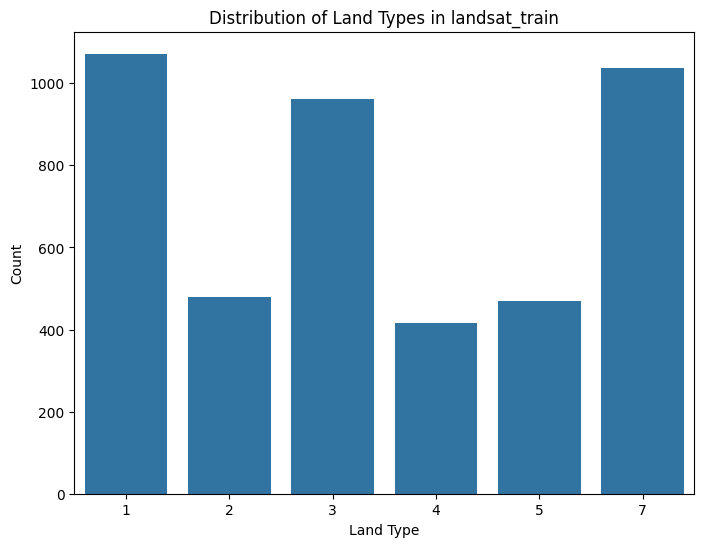

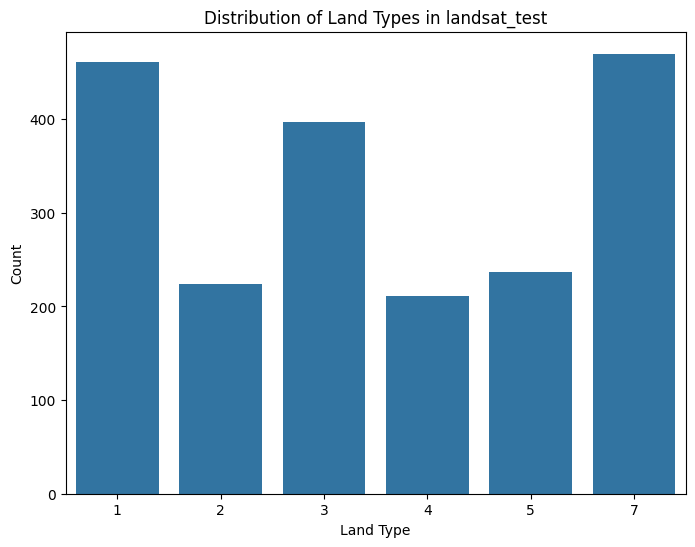

In [52]:
# Bar plot for landsat_train
plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Distribution of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# Bar plot for landsat_test
plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Distribution of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [53]:
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [54]:
numeric_features = landsat_train.drop('land_type', axis=1).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Executing the Model

In [55]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



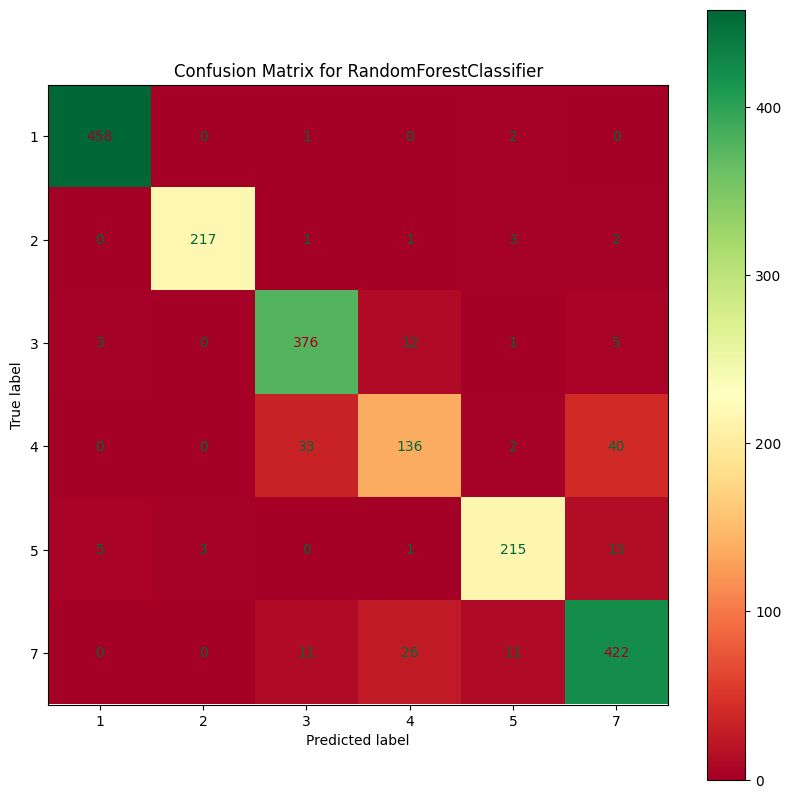

In [56]:
y_pred = pipeline_rf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='RdYlGn')
disp.figure_.set_size_inches(10, 10)
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

## Problem 2




### Reading the Data

In [57]:
# Already loaded in Problem 1
print("landsat_train shape:", landsat_train.shape)
print("landsat_test shape:", landsat_test.shape)

landsat_train shape: (4435, 37)
landsat_test shape: (2000, 37)


### Splitting Data into Train/Test

In [58]:
# Already split in Problem 1
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4435, 36)
X_test shape: (2000, 36)


### Building the Pipeline

In [59]:
# Same preprocessor as Problem 1
pipeline_ab = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

pipeline_ab

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

### Executing the Model

In [60]:
pipeline_ab.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

### Evaluating Model

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           1       0.93      0.86      0.89       461
           2       0.97      0.88      0.93       224
           3       0.87      0.92      0.90       397
           4       0.39      0.29      0.33       211
           5       0.63      0.71      0.67       237
           7       0.71      0.79      0.75       470

    accuracy                           0.78      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.78      0.78      0.78      2000



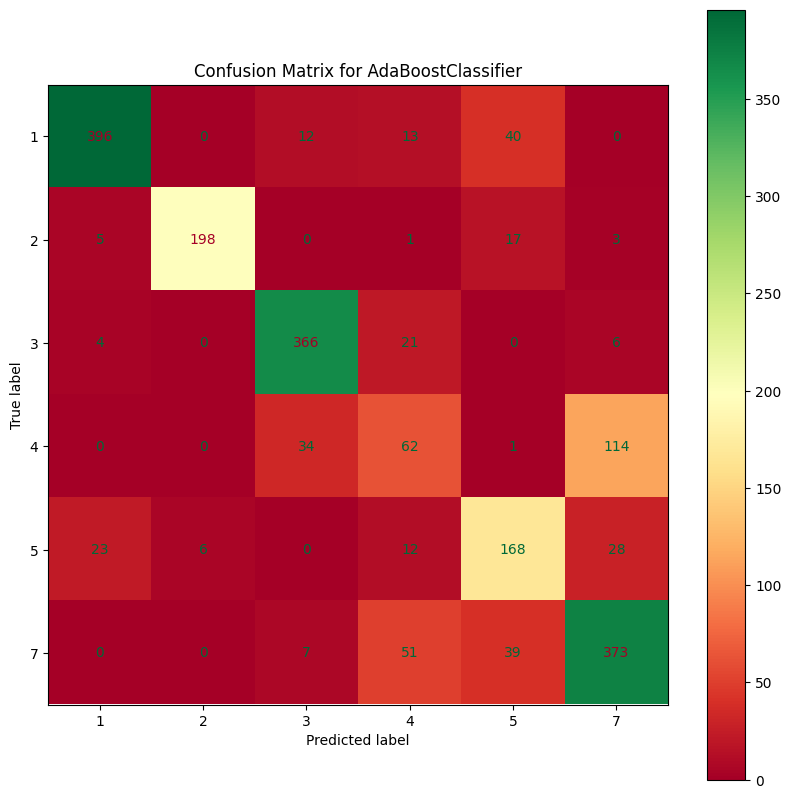

In [61]:
y_pred_ab = pipeline_ab.predict(X_test)

# Classification report
print("Classification Report (AdaBoost):")
print(classification_report(y_test, y_pred_ab))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab, cmap='RdYlGn')
disp.figure_.set_size_inches(10, 10)
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

## Problem 3

### Reading the Data

In [62]:
# Load banknote_authentication.csv
df_banknote = pd.read_csv('/content/gdrive/MyDrive/banknote_authentication.csv')
# Expected shape: (1372, 5)
print("df_banknote shape:", df_banknote.shape)
print("First few rows of df_banknote:")
print(df_banknote.head())

df_banknote shape: (1372, 5)
First few rows of df_banknote:
   variance  skewness  curtosis  entropy  forgery
0   3.62160    8.6661   -2.8073 -0.44699        0
1   4.54590    8.1674   -2.4586 -1.46210        0
2   3.86600   -2.6383    1.9242  0.10645        0
3   3.45660    9.5228   -4.0112 -3.59440        0
4   0.32924   -4.4552    4.5718 -0.98880        0


### Statistical and Visual Exploration


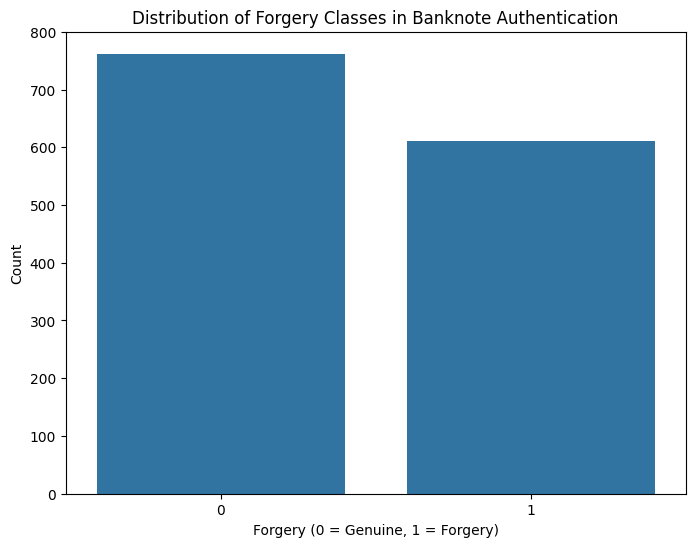

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='forgery', data=df_banknote)
plt.title('Distribution of Forgery Classes in Banknote Authentication')
plt.xlabel('Forgery (0 = Genuine, 1 = Forgery)')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [64]:
X_banknote = df_banknote.drop('forgery', axis=1)
y_banknote = df_banknote['forgery']
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = train_test_split(
    X_banknote, y_banknote, test_size=0.2, random_state=42
)

### Building the Pipeline

In [65]:
numeric_features_banknote = ['variance', 'skewness', 'curtosis', 'entropy']
preprocessor_banknote = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features_banknote)
    ])

pipeline_rf_banknote = Pipeline(steps=[
    ('preprocessor', preprocessor_banknote),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_rf_banknote

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Executing the Model

In [66]:
pipeline_rf_banknote.fit(X_train_banknote, y_train_banknote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

Classification Report (Banknote Authentication):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



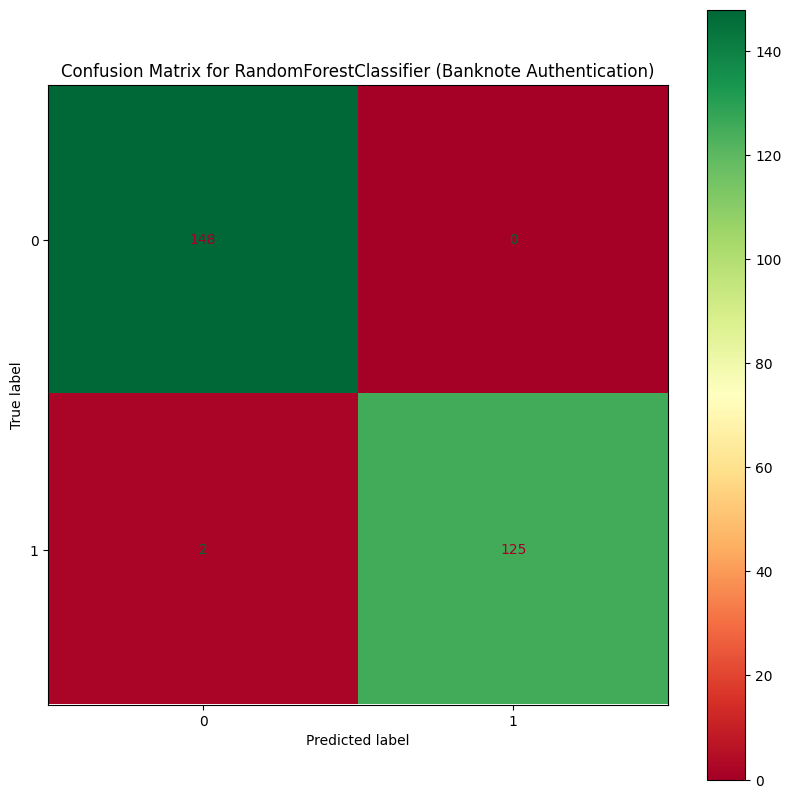

In [67]:
y_pred_banknote = pipeline_rf_banknote.predict(X_test_banknote)

# Classification report
print("Classification Report (Banknote Authentication):")
print(classification_report(y_test_banknote, y_pred_banknote))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay.from_predictions(y_test_banknote, y_pred_banknote, cmap='RdYlGn')
disp.figure_.set_size_inches(10, 10)
plt.title('Confusion Matrix for RandomForestClassifier (Banknote Authentication)')
plt.show()